# Peformance

This notebook shows the training and test performance obtain across different experiments

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt


In [15]:
exp_name = "gru_005"

pathfile = os.path.join(exp_name,"metrics","version_2","metrics.csv")
df = pd.read_csv(pathfile)

In [30]:
df.head(15)

,epoch,step,train_auc_eval,train_f1_eval,train_loss,train_loss_eval,train_map_eval,val_auc,val_f1,val_loss,val_map
0,0,0,0.497625,0.015724,NaN,0.689166,0.015082,NaN,NaN,NaN,NaN
1,0,282,NaN,NaN,0.076641,NaN,NaN,NaN,NaN,NaN,NaN
2,1,565,NaN,NaN,0.056784,NaN,NaN,NaN,NaN,NaN,NaN
3,2,848,NaN,NaN,0.054078,NaN,NaN,NaN,NaN,NaN,NaN
4,3,1131,NaN,NaN,0.052913,NaN,NaN,NaN,NaN,NaN,NaN
5,4,1414,NaN,NaN,0.052520,NaN,NaN,NaN,NaN,NaN,NaN
6,5,1697,NaN,NaN,0.052161,NaN,NaN,NaN,NaN,NaN,NaN
7,6,1980,NaN,NaN,0.051907,NaN,NaN,NaN,NaN,NaN,NaN
8,7,2263,NaN,NaN,0.051699,NaN,NaN,NaN,NaN,NaN,NaN
9,8,2546,NaN,NaN,0.051448,NaN,NaN,NaN,NaN,NaN,NaN


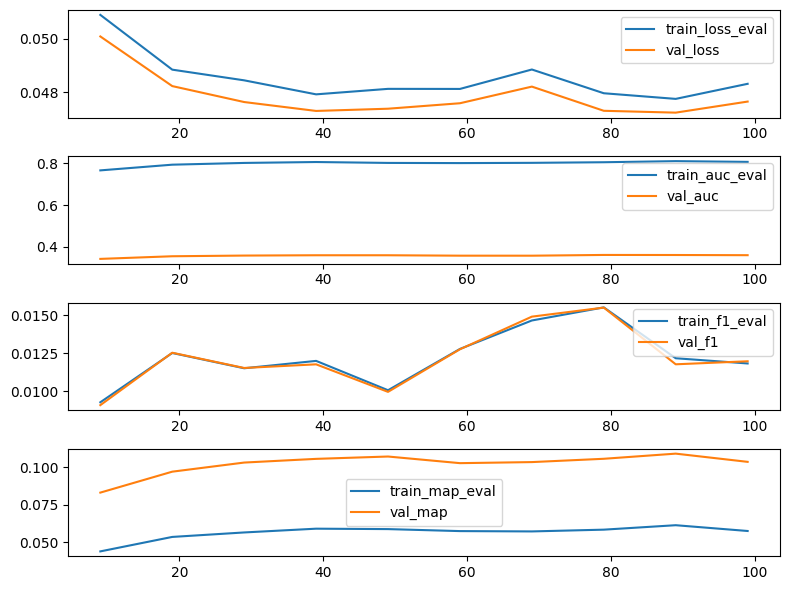

In [32]:
plt.figure(figsize=(8, 6))
plt.subplot(411)
x, y = df["epoch"], df["train_loss_eval"]
x = x[y.notna()]
y = y[y.notna()]
plt.plot(x[1:], y[1:], label="train_loss_eval")
x, y = df["epoch"], df["val_loss"]
x = x[y.notna()]
y = y[y.notna()]
plt.plot(x, y, label="val_loss")
plt.legend()

plt.subplot(412)
# plt.plot(df["epoch"], df["val_auc"], label="val_auc")
x, y = df["epoch"], df["train_auc_eval"]
x = x[y.notna()]
y = y[y.notna()]
plt.plot(x[1:], y[1:], label="train_auc_eval")
x, y = df["epoch"], df["val_auc"]
x = x[y.notna()]
y = y[y.notna()]
plt.plot(x, y, label="val_auc")
plt.legend()

plt.subplot(413)
# plt.plot(df["epoch"], df["val_f1"], label="val_f1")
x, y = df["epoch"], df["train_f1_eval"]
x = x[y.notna()]
y = y[y.notna()]
plt.plot(x[1:], y[1:], label="train_f1_eval")
x, y = df["epoch"], df["val_f1"]
x = x[y.notna()]
y = y[y.notna()]
plt.plot(x, y, label="val_f1")
plt.legend()

plt.subplot(414)
# plt.plot(df["epoch"], df["val_map"], label="val_map")
x, y = df["epoch"], df["train_map_eval"]
x = x[y.notna()]
y = y[y.notna()]
plt.plot(x[1:], y[1:], label="train_map_eval")
x, y = df["epoch"], df["val_map"]
x = x[y.notna()]
y = y[y.notna()]
plt.plot(x, y, label="val_map")
plt.legend()

plt.tight_layout() 